# PART 1- LOGISTIC REGRESSION

## Q.1 (a ) Plot the sigmoid function. Print your interpretation on why this function is useful for a classification problem.



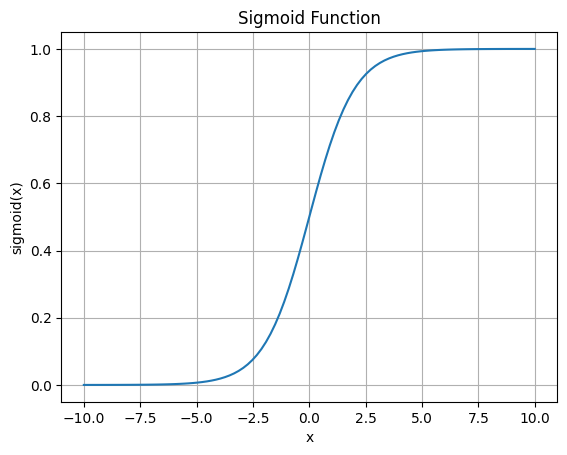

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()

## Interpretation:
- **Output Range**: Sigmoid function outputs range between 0 and 1, perfect for binary classification. It gives the probability of an input belonging to a class.
- **Smoothness**: Its smooth and continuous derivative is ideal for gradient-based optimization like gradient descent. This stability aids in efficient learning.
- **Non-linearity**: While less flexible than ReLU, sigmoid adds non-linearity, helping neural networks learn intricate patterns for accurate predictions.
- **Differentiability**: Sigmoid is differentiable everywhere, crucial for backpropagation in neural network training. Its smoothness ensures efficient computation of derivatives for learning.
s.

##    (b) Plot the log functions in the cost function individually. Print your interpretation of the log functions.



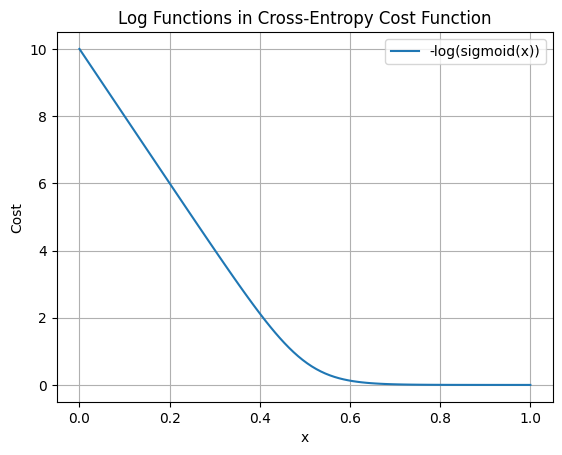

In [27]:
# Define log functions
def log1(x):
    return -np.log(sigmoid(x))

x1 = np.linspace(0, 1, 100)

# Plot log functions
plt.plot(x1, log1(x), label='-log(sigmoid(x))')
plt.title('Log Functions in Cross-Entropy Cost Function')
plt.xlabel('x')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

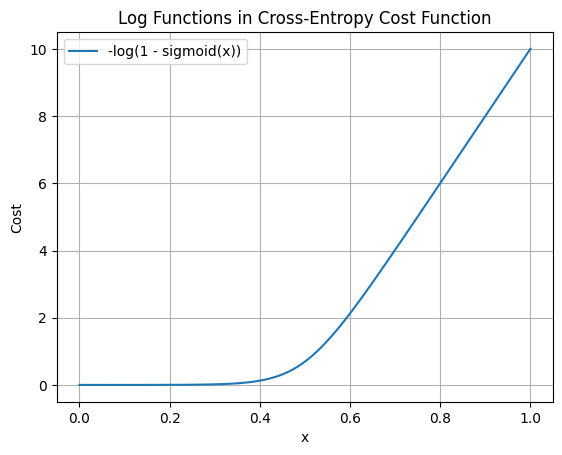

In [28]:
# Define log functions
def log2(x):
    return -np.log(1 - sigmoid(x))
    
x1 = np.linspace(0, 1, 100)

# Plot log functions
plt.plot(x1, log2(x), label='-log(1 - sigmoid(x))')
plt.title('Log Functions in Cross-Entropy Cost Function')
plt.xlabel('x')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

##  c) Using your own data for a single feature problem, and assuming linear regression problem, plot the cost function and the corresponding contours. Also, using cross entropy as the cost function, plot it as well as its contours.



In [29]:
import pandas as pd
linear_reg_df = pd.read_csv('univariate_linear_regression.csv')

In [30]:
linear_reg_df

,x,y
0,-1.932,-13.569
1,-2.953,-19.207
2,8.879,17.665
3,9.259,15.835
4,3.033,-0.495
...,...,...
195,5.415,7.125
196,3.333,0.857
197,-3.493,-20.700
198,8.839,15.153


In [31]:
# Read data
X = linear_reg_df['x'].values.reshape(-1, 1)  # Reshape X, y
y = linear_reg_df['y'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


In [32]:
# Number of samples
m = len(X)

# Feature scaling (normalize)
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add bias term to X
X_b = np.c_[np.ones((m, 1)), X_normalized]
print(X_b.shape)

# Number of features
n = X_b.shape[1]

# Initialize w with zeros
w = np.zeros((n, 1)) 

(200, 2)


In [33]:
def compute_gradient(X, y, W):
    m = len(y)
    # print(X.shape)
    predictions = np.dot(X, W)
    # print(predictions.shape)
    errors = predictions - y
    gradient = (1/m) * np.dot(X.T, errors)
    return gradient

# cost_values

def grad_descent(X, y, W, alpha, max_iteration=2000, epsilon=1e-5):
    cost_values = []
    for i in range(max_iteration):
        grad = compute_gradient(X, y, W)
        W = W - alpha * grad
        cost = compute_cost(X, y, W)
        cost_values.append(cost)
        
        if np.linalg.norm(grad) < epsilon:
            break
    return W, cost_values

def compute_cost(X, y, W):
    m = len(y)
    J = (1/(2*m)) * np.sum((np.dot(X, W) - y)**2)
    return J

In [34]:
alpha = 0.01

w_best, cost_hist = grad_descent(X_b, y, w, alpha, max_iteration=2000, epsilon=1e-5)
w_best

array([[-8.29638066],
       [16.972687  ]])

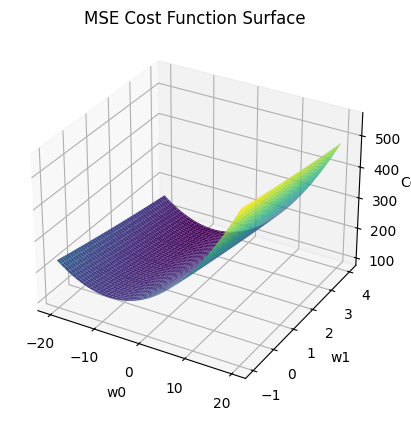

In [58]:

import matplotlib.pyplot as plt

# Define a grid of w0 and w1 values
w0_vals = np.linspace(-20, 20, 100)
w1_vals = np.linspace(-1, 4, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

# Compute cost for each combination of w0 and w1
J_vals = np.zeros_like(W0)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w_tmp = np.array([[W0[i, j]], [W1[i, j]]])
        J_vals[i, j] = compute_cost(X_b, y, w_tmp)

# Plot cost function surface
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W0, W1, J_vals, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cost')
ax.set_title('MSE Cost Function Surface')

plt.show()


<Figure size 2000x1000 with 0 Axes>

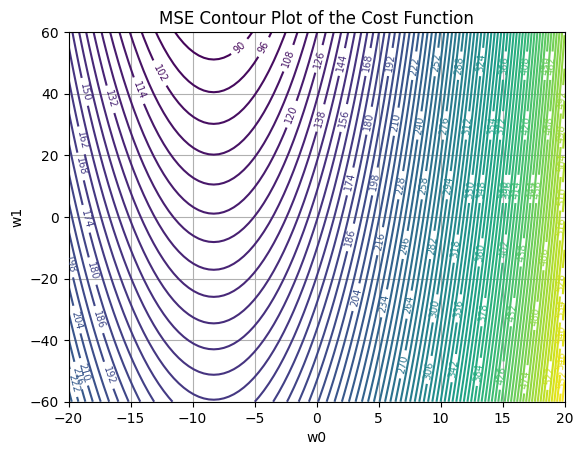

In [64]:

# For the contour plot
x_1 = np.linspace(-20, 20, 100)
y_1 = np.linspace(-60, 60, 100)
X_1, Y_1 = np.meshgrid(x_1, y_1)

plt.figure(figsize=(20, 10)) 
plt.figure()
cp = plt.contour(X_1, Y_1, J_vals, 80)
plt.clabel(cp, fontsize=7)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('MSE Contour Plot of the Cost Function')
plt.grid()

plt.show()

## Cross Entropy Loss

In [41]:

def cross_entropy_loss(X, y, W):
    m = len(y)
    h = sigmoid(np.dot(X, W))
    epsilon = 1e-5
    cost = -1/m * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost    


In [46]:
def compute_gradient(X, y, W):
    m = len(y)
    predictions = np.dot(X, W)
    errors = predictions - y
    gradient = (1/m) * np.dot(X.T, errors)
    return gradient

def grad_descent_cross(X, y, W, alpha, max_iteration=2000, epsilon=1e-5):
    cost_values = []
    for i in range(max_iteration):
        grad = compute_gradient(X, y, W)
        W = W - alpha * grad
        cost = cross_entropy_loss(X, y, W)
        cost_values.append(cost)
        
        if np.linalg.norm(grad) < epsilon:
            break
    return W, cost_values


In [47]:
alpha = 0.01

w_best1, cost_hist1 = grad_descent_cross(X_b, y, w, alpha, max_iteration=2000, epsilon=1e-5)
w_best1

array([[-8.29638066],
       [16.972687  ]])

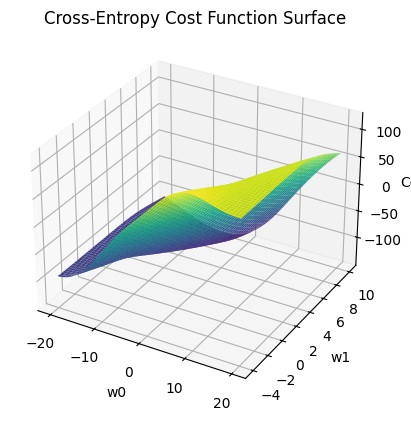

In [61]:

# Define a grid of w0 and w1 values
w0_vals = np.linspace(-20, 20, 100)
w1_vals = np.linspace(-4, 10, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
W = np.c_[W0.ravel(), W1.ravel()]

# Compute cost for each combination of w0 and w1
J_vals1 = np.zeros_like(W0)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w_tmp = np.array([[W0[i, j]], [W1[i, j]]])
        J_vals1[i, j] = cross_entropy_loss(X_b, y, w_tmp)

# Plot cost function surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W0, W1, J_vals1, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cost')
ax.set_title('Cross-Entropy Cost Function Surface')

plt.show()


<Figure size 2000x2000 with 0 Axes>

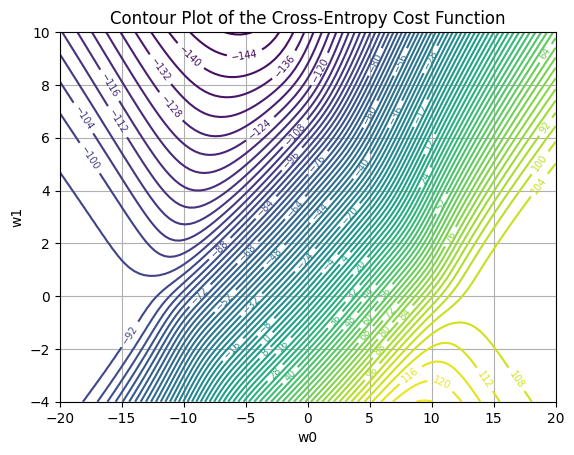

In [62]:
# For the contour plot
plt.figure(figsize=(20, 20)) 
plt.figure()
cp = plt.contour(W0, W1, J_vals1, 70)
plt.clabel(cp, fontsize=7)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Contour Plot of the Cross-Entropy Cost Function')
plt.grid()

plt.show()